In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score


In [2]:
df = pd.read_csv('./Hitters.csv')

In [3]:
# Verisetindeki eksik değerleri (NaN) kaldırıyoruz.
df = df.dropna()

# 'League', 'Division' ve 'NewLeague' değişkenleri için one-hot encoding yapıyoruz.
# One-hot encoding: Kategorik değişkenleri 0 ve 1'den oluşan sütunlara dönüştürme yöntemidir.
# Örneğin, bir 'Color' değişkeni kırmızı, mavi, yeşil değerlerine sahipse:
# 'Color_red', 'Color_blue', 'Color_green' adında sütunlar oluşturulur ve her satırda sadece bir sütun 1, diğerleri 0 olur.
# Bu işlem, modelin kategorik değişkenleri daha iyi anlamasına olanak sağlar.
# Dummy değişken: Kategorik bir değişkenin her bir sınıfı için oluşturulan 0 ve 1 değerlerinden oluşan yeni değişkenlerdir.
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

# Hedef değişkeni (bağımlı değişken) olarak 'Salary' değişkenini ayırıyoruz.
y = df['Salary']

# 'Salary', 'League', 'Division', 'NewLeague' değişkenlerini bağımsız değişkenlerden çıkarıyoruz.
# Geriye kalan değişkenleri bağımsız değişkenler (X_) olarak seçiyoruz ve veri tiplerini float64 olarak belirliyoruz.
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# One-hot encoding sonucu oluşan belirli dummy değişkenleri (League_N, Division_W, NewLeague_N) X_'e ekliyoruz.
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

# Veriyi eğitim ve test setleri olarak ayırıyoruz. Verinin %25'i test, %75'i eğitim için ayrılıyor.
# Ayrıca, random_state=42 ile sonuçların tekrar edilebilir olmasını sağlıyoruz.
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [4]:
lambdalar = 10**np.linspace(10,-2,100)
# Ridge modelini varsayılan parametrelerle (alpha=1) oluşturuyoruz.
ridge_model = Ridge()

# Katsayılar listesini başlatıyoruz. Bu liste, farklı alpha (ceza katsayısı) değerlerine göre
# Ridge modelinin katsayılarını (coef_) saklamak için kullanılıyor.
katsayilar = []

# Belirli bir alpha değerleri (lambdalar) kümesindeki her bir alpha için Ridge modelini eğitip katsayıları kaydediyoruz.
for i in lambdalar:
    # Modelin ceza parametresi (alpha) değerini güncelliyoruz.
    ridge_model.set_params(alpha=i)
    
    # Ridge modelini, eğitim verileri (X_train ve y_train) ile yeniden eğitiyoruz.
    ridge_model.fit(X_train, y_train)
    
    # Modelin katsayılarını (coef_) katsayilar listesine ekliyoruz.
    # Bu, farklı alpha değerleri için katsayıların nasıl değiştiğini görmek amacıyla yapılıyor.
    katsayilar.append(ridge_model.coef_)


Text(0.5, 1.0, 'Ridge Regresyonda Alpha Değerine Göre Katsayıların Değişimi')

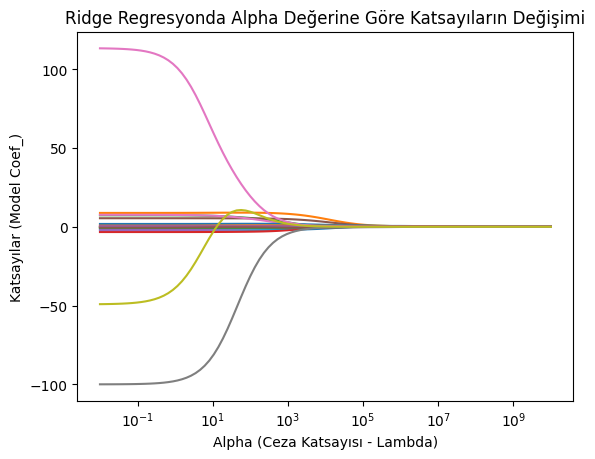

In [6]:
# Mevcut ekseni (ax) alıyoruz. Bu, grafiği çizmek için kullanılacak eksen nesnesini temsil eder.
ax = plt.gca()

# Katsayıların değişimini lambdalar (alpha değerleri) üzerinden görselleştiriyoruz.
# X ekseni: Ridge modelinin ceza katsayısı (lambdalar)
# Y ekseni: Modelin katsayıları (katsayilar)
ax.plot(lambdalar, katsayilar)

# X eksenini logaritmik ölçeğe çeviriyoruz. Bu, büyük ve küçük alpha değerlerini daha iyi karşılaştırmamızı sağlar.
ax.set_xscale('log')

# X ekseni için bir açıklama ekliyoruz. (Lambda veya alpha değerlerini temsil eder.)
ax.set_xlabel('Alpha (Ceza Katsayısı - Lambda)')

# Y ekseni için bir açıklama ekliyoruz. (Katsayılar - coef_)
ax.set_ylabel('Katsayılar (Model Coef_)')

# Başlık ekleyerek görselleştirmeyi anlamlı hale getiriyoruz.
ax.set_title('Ridge Regresyonda Alpha Değerine Göre Katsayıların Değişimi')


In [7]:
ridge_model = Ridge().fit(X_train,y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(356.8082905730243)

In [8]:
lambdalar1=np.random.randint(0,1000,100)

In [9]:
lambdalar2 = 10**np.linspace(10,-2,100)*0.5

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#ridge_model = Ridge().fit(X_train_scaled, y_train)
#y_pred = ridge_model.predict(X_test_scaled)

ridgecv = RidgeCV(alphas = lambdalar1,scoring = "neg_mean_squared_error",cv = 10,)
ridgecv.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([138, 469,  69, 523, 170, 828, 107,  10, 346, 680, 215, 230, 906,
       392, 813, 440, 557, 980, 587, 236, 770, 238, 184, 201, 151,   9,
       826, 752, 645, 272,  17, 755, 172, 861, 603, 103, 605,  56, 378,
       736,  84, 692,   7, 813, 687, 693, 626, 760, 826, 609,  70, 627,
       147, 245, 816, 675, 861, 900, 416, 176, 270, 769, 123, 547, 203,
        40, 558, 146, 343, 482, 703, 598, 874, 174,  72,  56, 734, 472,
       720, 914, 234, 847,  18, 238, 543, 505, 922, 603, 571, 281, 153,
       775, 929, 973, 807,  75, 530, 248, 461, 936], dtype=int32),
        cv=10, scoring='neg_mean_squared_error')

In [18]:
ridgecv.alpha_

np.int32(138)

In [16]:
df['Salary']

1       475.0
2       480.0
3       500.0
4        91.5
5       750.0
        ...  
317     700.0
318     875.0
319     385.0
320     960.0
321    1000.0
Name: Salary, Length: 263, dtype: float64

In [20]:
ridge_tuned = Ridge(alpha = ridgecv.alpha_).fit(X_train_scaled,y_train)
ridge_tuned
y_pred = ridge_tuned.predict(X_test_scaled)
RMSE = np.sqrt(np.mean(mean_squared_error(y_test,y_pred)))
RMSE

np.float64(386.50483284819154)